In [0]:
#DATA IMPORT
import pandas as pd
df = pd.read_csv("/Workspace/Users/kamiltomczyk.dev@gmail.com/transactions.csv")
df.head()

,transaction_id,customer_id,amount,status,transaction_date
0,T00000,C000,124.84,completed,2023-07-09
1,T00001,C001,93.09,completed,2023-05-16
2,T00002,C002,132.38,completed,2023-02-12
3,T00003,C003,176.15,failed,2023-12-19
4,T00004,C004,88.29,completed,2023-03-31


In [0]:
# Data type correction
df["transaction_date"] = pd.to_datetime(df["transaction_date"], errors='coerce')

In [0]:
#DATA PROFILING

missing_values = df.isnull().sum()
data_types = df.dtypes
basic_stats = df.describe(include='all')
unique_status = df['status'].unique()

/home/spark-f62354de-68ed-42d2-b9ac-7e/.ipykernel/2768/command-6115378876161757-3964733215:7: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  basic_stats = df.describe(include='all')


,transaction_id,customer_id,amount,status,transaction_date
count,1000,990,985.000000,1000,1000
unique,999,100,NaN,3,337
top,T00006,C000,NaN,completed,2023-11-17 00:00:00
freq,2,10,NaN,699,8
first,NaN,NaN,NaN,NaN,2023-01-01 00:00:00
last,NaN,NaN,NaN,NaN,2023-12-31 00:00:00
mean,NaN,NaN,96.059614,NaN,NaN
std,NaN,NaN,56.994764,NaN,NaN
min,NaN,NaN,-203.040000,NaN,NaN
25%,NaN,NaN,64.780000,NaN,NaN


In [0]:
#DATA QUALITY CHECKS

dq1_missing_amount = df[df['amount'].isnull()]
dq1_missing_customer = df[df['customer_id'].isnull()]
dq2_negative_amount = df[df['amount'] < 0]
dq3_duplicates = df[df.duplicated('transaction_id', keep=False)]
dq4_inconsistent_completed = df[(df['status'] == 'completed') & ((df['amount'] <= 0) | (df['amount'].isnull()))]

In [0]:
#DATA QUALITY RAPORT

error_raport = {
    "dq1_missing_amounts": len(dq1_missing_amount),
    "dq1_missing_customers": len(dq1_missing_customer),
    "dq2_negative_amounts": len(dq2_negative_amount),
    "dq3_duplicates": len(dq3_duplicates),
    "dq4_inconsistent_completed": len(dq4_inconsistent_completed)
}

raport_df = pd.DataFrame.from_dict(error_raport, orient='index', columns=['error_count'])
print(raport_df)

                            error_count
dq1_missing_amounts                  15
dq1_missing_customers                10
dq2_negative_amounts                 37
dq3_duplicates                        2
dq4_inconsistent_completed           37


In [0]:
#EXPORT DATA

raport_df.to_csv("/Workspace/Users/kamiltomczyk.dev@gmail.com/raport.csv")

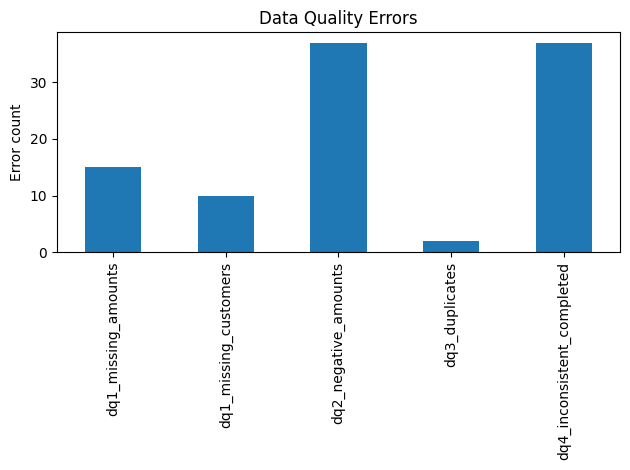

In [0]:
#DATA VISUALIZATION

import matplotlib.pyplot as plt

raport_df.plot(kind="bar", legend=False, title="Data Quality Errors")
plt.ylabel("Error count")
plt.tight_layout()
plt.show()